In [19]:
import pickle
import os
import numpy as np

In [35]:
base_dirs = ['/localdata/juan/numenor/']
experiments = ['mcpilco_lndropoutd_dropoutp_no_clip_8',
               'mcpilco_lndropoutd_dropoutp_1000_clip_8',
               'mcpilco_lndropoutd_dropoutp_100_clip_8',
               'mcpilco_lndropoutd_dropoutp_10_clip_8',
               'mcpilco_lndropoutd_dropoutp_1_clip_8',
               'mcpilco_lndropoutd_dropoutp_01_clip_8',
               'mcpilco_lndropoutd_dropoutp_001_clip_8',
               'mcpilco_lndropoutd_dropoutp_0001_clip_8',]
result_files = []
for b in base_dirs:
    dirs = os.listdir(b)
    for e in experiments:
        for d in dirs:
            if d.find(e) == 0:
                res_dir = os.path.join(b,d)
                res_file = os.path.join(res_dir, 'results_50_20')
                result_files.append(res_file)
                res_file = os.path.join(res_dir, 'results_50_10')
                result_files.append(res_file)
print(result_files)

['/localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_no_clip_8/results_50_20', '/localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_no_clip_8/results_50_10', '/localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_no_clip_8_1509735880.8/results_50_20', '/localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_no_clip_8_1509735880.8/results_50_10', '/localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_1000_clip_8_1509735712.94/results_50_20', '/localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_1000_clip_8_1509735712.94/results_50_10', '/localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_1000_clip_8/results_50_20', '/localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_1000_clip_8/results_50_10', '/localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_100_clip_8/results_50_20', '/localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_100_clip_8/results_50_10', '/localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_10_clip_8/results_50_20', '/localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_10_clip_8/res

In [36]:
from collections import OrderedDict
result_arrays = OrderedDict()
for rpath in result_files:
    if not os.path.isfile(rpath):
        continue
    with open(rpath, 'rb') as f:
        print('Opening %s' % rpath)
        exp_type = None
        for e in experiments:
            if rpath.find(e) >= 0:
                exp_type = e
                break
        arrays = result_arrays.get(exp_type, [])
        arrays.append(pickle.load(f))
        result_arrays[exp_type] = arrays
print(result_arrays.keys())

Opening /localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_no_clip_8_1509735880.8/results_50_10
Opening /localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_1000_clip_8_1509735712.94/results_50_20
Opening /localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_1000_clip_8_1509735712.94/results_50_10
Opening /localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_1000_clip_8/results_50_20
Opening /localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_100_clip_8/results_50_20
Opening /localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_100_clip_8/results_50_10
Opening /localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_10_clip_8/results_50_20
Opening /localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_10_clip_8/results_50_10
Opening /localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_1_clip_8/results_50_20
Opening /localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_1_clip_8/results_50_10
Opening /localdata/juan/numenor/mcpilco_lndropoutd_dropoutp_01_clip_8/results_50_20
Opening /localdata/juan/numen

In [37]:
from collections import OrderedDict
# gather all costs
costs = OrderedDict()
for e in result_arrays:
    exp_results = result_arrays[e]
    costs_e = []
    for results in exp_results:
        costs_i = []
        #learning_iter
        for rj in results: 
            costs_ij = []
            #trial
            for r in rj:
                costs_ij.append(r[2])
            costs_i.append(costs_ij)
        if len(costs_i) > 0 :
            costs_e.append(costs_i)
    costs_i = np.concatenate(costs_e, axis=1).squeeze()
    costs_i = costs_i/costs_i.shape[-1]
    print e, costs_i.shape
    mean_sum_costs = costs_i.sum(-1).mean(-1)
    std_sum_costs = costs_i.sum(-1).std(-1)
    costs[e] = (mean_sum_costs, std_sum_costs)
    

mcpilco_lndropoutd_dropoutp_no_clip_8 (50, 10, 25)
mcpilco_lndropoutd_dropoutp_1000_clip_8 (50, 50, 25)
mcpilco_lndropoutd_dropoutp_100_clip_8 (50, 30, 25)
mcpilco_lndropoutd_dropoutp_10_clip_8 (50, 30, 25)
mcpilco_lndropoutd_dropoutp_1_clip_8 (50, 30, 25)
mcpilco_lndropoutd_dropoutp_01_clip_8 (50, 30, 25)
mcpilco_lndropoutd_dropoutp_001_clip_8 (50, 30, 25)
mcpilco_lndropoutd_dropoutp_0001_clip_8 (50, 30, 25)


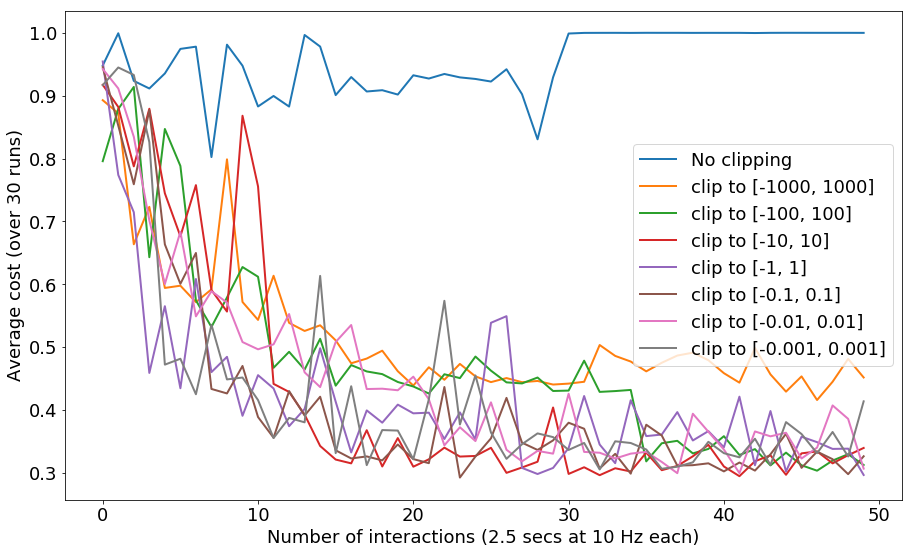

In [41]:
names = ['No clipping', 'clip to [-1000, 1000]', 'clip to [-100, 100]', 'clip to [-10, 10]', 'clip to [-1, 1]',
         'clip to [-0.1, 0.1]', 'clip to [-0.01, 0.01]', 'clip to [-0.001, 0.001]', 'clip to [-0.0001, 0.0001]']
names = dict(zip(costs.keys(),names))
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(15,9))
t = range(len(costs.values()[0][1]))
for e in costs:
    mean, std = costs[e]
    min_ = np.minimum.accumulate(mean)
    if e.find('rbf') < 0:
        pl, = plt.plot(t, mean, label=names[e], linewidth=2)
        alpha = 0.5
        for i in range(1,2):
            alpha = alpha*0.8
            #lower_bound = mean - i*0.5*std
            #upper_bound = mean + i*0.5*std
            #plt.fill_between(t, lower_bound, upper_bound, alpha=alpha, color=pl.get_color())
plt.legend()
plt.xlabel('Number of interactions (2.5 secs at 10 Hz each)')
plt.ylabel('Average cost (over 30 runs)')
plt.show()

In [40]:
0.3*25


7.5